Sankaran S - 07/07/2025

# **Gold price prediction in India**

## Importing libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
from pandas import DataFrame
import requests
import re 
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import pickle
import gradio as gr

## Data collections

### Extracting USD_INR exchange rate

In [2]:
# Collect USD_INR exchange rate using yfinance
usd_inr: DataFrame = yf.download(tickers="USDINR=X", start="2024-01-01", end="2025-07-07") # type: ignore
display(usd_inr.head())

C:\Users\sanka\AppData\Local\Temp\ipykernel_12996\3593658626.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usd_inr: DataFrame = yf.download(tickers="USDINR=X", start="2024-01-01", end="2025-07-07") # type: ignore
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X
Date,,,,,
2024-01-01,83.248596,83.237999,83.150002,83.248596,0
2024-01-02,83.202599,83.343002,83.169800,83.202599,0
2024-01-03,83.257004,83.333702,83.246201,83.257004,0
2024-01-04,83.318100,83.360298,83.202103,83.318100,0
2024-01-05,83.240601,83.271599,83.035004,83.240601,0


In [3]:
usd_inr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 392 entries, 2024-01-01 to 2025-07-04
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, USDINR=X)   392 non-null    float64
 1   (High, USDINR=X)    392 non-null    float64
 2   (Low, USDINR=X)     392 non-null    float64
 3   (Open, USDINR=X)    392 non-null    float64
 4   (Volume, USDINR=X)  392 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 18.4 KB


In [4]:
usd_inr.reset_index(inplace= True)

In [5]:
usd_inr.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X
0,2024-01-01,83.248596,83.237999,83.150002,83.248596,0
1,2024-01-02,83.202599,83.343002,83.169800,83.202599,0
2,2024-01-03,83.257004,83.333702,83.246201,83.257004,0
3,2024-01-04,83.318100,83.360298,83.202103,83.318100,0
4,2024-01-05,83.240601,83.271599,83.035004,83.240601,0


In [6]:
usd_inr.tail()

Price,Date,Close,High,Low,Open,Volume
Ticker,,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X
387,2025-06-30,85.455299,85.927696,85.241997,85.455299,0
388,2025-07-01,85.713997,85.741699,85.459297,85.713997,0
389,2025-07-02,85.642799,85.771004,85.510498,85.642799,0
390,2025-07-03,85.694099,85.697998,85.192703,85.694099,0
391,2025-07-04,85.319099,85.553001,85.307297,85.319099,0


In [7]:
#keep only relevent columns
usd_inr = usd_inr[['Date', 'Close']]

In [8]:
#Changing colun names
usd_inr.columns = ['Date', 'USD_INR']

In [9]:
usd_inr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     392 non-null    datetime64[ns]
 1   USD_INR  392 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [10]:
usd_inr

,Date,USD_INR
0,2024-01-01,83.248596
1,2024-01-02,83.202599
2,2024-01-03,83.257004
3,2024-01-04,83.318100
4,2024-01-05,83.240601
...,...,...
387,2025-06-30,85.455299
388,2025-07-01,85.713997
389,2025-07-02,85.642799
390,2025-07-03,85.694099


## Scraping the gold prices from the website

### Extracting 2024 data

In [12]:
url_2024 = "https://www.exchange-rates.org/api/v2/rates/GetChartRates?dataDisplayMode=2&from=XAU&to=INR&countryCode=IN&unit=G&karat=22&groupId=2024&dateFrom=2024-1-1&dateTo=2024-12-31&rateFormat=null&regenerateSectionHeader=true&pageCode=PreciousMetalHistoryByCountry"


response_2024 = requests.get(url_2024)
data_2024 = response_2024.json()  

In [13]:
data_2024

{'ErrorMessage': None,
 'SectionHeader': None,
 'StatisticsHtml': '<p>This chart shows gold prices in India for 2024. Prices are in Indian Rupees per gram\r\n\r\nfor 22K gold\r\n.</p>',
 'FAQHtml': '<section class="faq-section wo-title"><h2>What was the average gold price in India in 2024?</h2>\n<p>The average price of gold in 2024 was <span class="currencySymbol">₹</span>5,895.44 per gram.</p>\n<h2>What was the highest gold price in India in 2024?</h2>\n<p>The high point per gram of\r\n22K\r\ngold during 2024 was <span class="currencySymbol">₹</span>6,907.09 on October 30, 2024.</p>\n<h2>What was the lowest gold price in India in 2024?</h2>\n<p>The low point was <span class="currencySymbol">₹</span>4,877.01 per gram of gold on February 13, 2024.</p>\n<h2>Was the price of gold in India up or down in 2024?</h2>\n<p>The price of\r\n22K\r\ngold in INR was\r\nup <span class="rate-change rate-green">+30.67%</span>\r\nin 2024.</p>\n</section>',
 'ChartData': '[[D(2024,1,1),R(5066311,3)],[D(2

In [ ]:
# Extract the dates and prices for 2024 
chart_data_2024 = data_2024['ChartData']

pattern = r"D\((\d+),(\d+),(\d+)\),R\((\d+),(\d+)\)"

matches_2024 = re.findall(pattern, chart_data_2024)

parsed_data_2024 = []
for year, month, day, value, decimal in matches_2024:
    date = datetime(int(year), int(month), int(day))
    price = int(value) / (10 ** int(decimal)) # e.g: divide by 1000
    parsed_data_2024.append((date, round(price, 2)))
    
df_2024 = pd.DataFrame(parsed_data_2024, columns=["Date", "gold_rate"])

In [16]:
df_2024

,Date,gold_rate
0,2024-01-01,5066.31
1,2024-01-02,5053.34
2,2024-01-03,5014.55
3,2024-01-04,5012.48
4,2024-01-05,5015.20
...,...,...
257,2024-12-25,6595.73
258,2024-12-26,6650.44
259,2024-12-27,6597.52
260,2024-12-30,6585.39


### Extracting 2025 data

In [17]:
url_2025 = "https://www.exchange-rates.org/api/v2/rates/GetChartRates?dataDisplayMode=2&from=XAU&to=INR&countryCode=IN&unit=G&karat=22&groupId=2025&dateFrom=2025-1-1&dateTo=2025-12-31&rateFormat=null&regenerateSectionHeader=true&pageCode=PreciousMetalHistoryByCountry"

response_2025 = requests.get(url_2025)
data_2025 = response_2025.json()

In [18]:
data_2025

{'ErrorMessage': None,
 'SectionHeader': None,
 'StatisticsHtml': '<p>This chart shows gold prices in India for 2025. Prices are in Indian Rupees per gram\r\n\r\nfor 22K gold\r\n.</p>',
 'FAQHtml': '<section class="faq-section wo-title"><h2>What was the average gold price in India in 2025?</h2>\n<p>The average price of gold in 2025 was <span class="currencySymbol">₹</span>7,835.23 per gram.</p>\n<h2>What was the highest gold price in India in 2025?</h2>\n<p>The high point per gram of\r\n22K\r\ngold during 2025 was <span class="currencySymbol">₹</span>8,714.51 on June 13, 2025.</p>\n<h2>What was the lowest gold price in India in 2025?</h2>\n<p>The low point was <span class="currencySymbol">₹</span>6,617.80 per gram of gold on January 1, 2025.</p>\n<h2>Was the price of gold in India up or down in 2025?</h2>\n<p>The price of\r\n22K\r\ngold in INR was\r\nup <span class="rate-change rate-green">+26.97%</span>\r\nin 2025.</p>\n</section>',
 'ChartData': '[[D(2025,1,1),R(6617799,3)],[D(2025,1

In [19]:
# Extract the dates and prices for 2024 
chart_data_2025 = data_2025['ChartData']

pattern = r"D\((\d+),(\d+),(\d+)\),R\((\d+),(\d+)\)"

matches_2025 = re.findall(pattern, chart_data_2025)

parsed_data_2025 = []
for year, month, day, value, decimal in matches_2025:
    date = datetime(int(year), int(month), int(day))
    price = int(value) / (10 ** int(decimal)) # e.g: divide by 1000
    parsed_data_2025.append((date, round(price, 2)))
    
df_2025 = pd.DataFrame(parsed_data_2025, columns=["Date", "gold_rate"])
display(df_2025)

,Date,gold_rate
0,2025-01-01,6617.80
1,2025-01-02,6723.70
2,2025-01-03,6676.08
3,2025-01-06,6653.73
4,2025-01-07,6698.45
...,...,...
132,2025-07-04,8419.91
133,2025-07-07,8461.03
134,2025-07-08,8339.93
135,2025-07-09,8386.78


In [20]:
# Append the 2024 & 2025
gold_data = pd.concat([df_2024, df_2025])
display(gold_data)

,Date,gold_rate
0,2024-01-01,5066.31
1,2024-01-02,5053.34
2,2024-01-03,5014.55
3,2024-01-04,5012.48
4,2024-01-05,5015.20
...,...,...
132,2025-07-04,8419.91
133,2025-07-07,8461.03
134,2025-07-08,8339.93
135,2025-07-09,8386.78


In [21]:
# Merge the 2 dataframes 
gold_dataset = pd.merge(usd_inr, gold_data, on='Date', how='inner')
display(gold_dataset)

,Date,USD_INR,gold_rate
0,2024-01-01,83.248596,5066.31
1,2024-01-02,83.202599,5053.34
2,2024-01-03,83.257004,5014.55
3,2024-01-04,83.318100,5012.48
4,2024-01-05,83.240601,5015.20
...,...,...,...
387,2025-06-30,85.455299,8353.43
388,2025-07-01,85.713997,8433.58
389,2025-07-02,85.642799,8496.36
390,2025-07-03,85.694099,8369.92


## Exploratory Data Analysis

-- Handle Missing values - None

-- Handle imbalanced dataset - None

-- Hande outliers - Noted

-- Encode catagorical features - None

-- Normalization or Standardisation - Standardisation

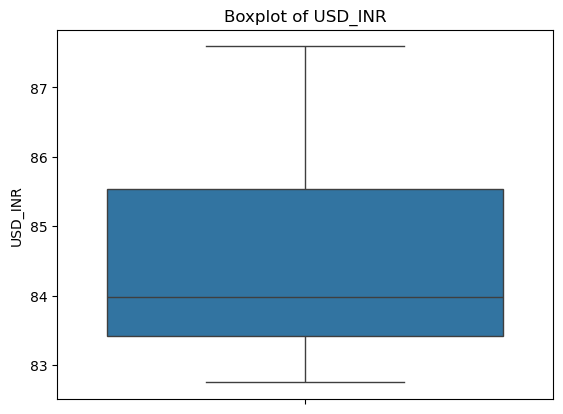

In [25]:
# Visualize the variable in boxplot
sns.boxplot(data=gold_dataset, y= 'USD_INR')
plt.title("Boxplot of USD_INR")
plt.show()

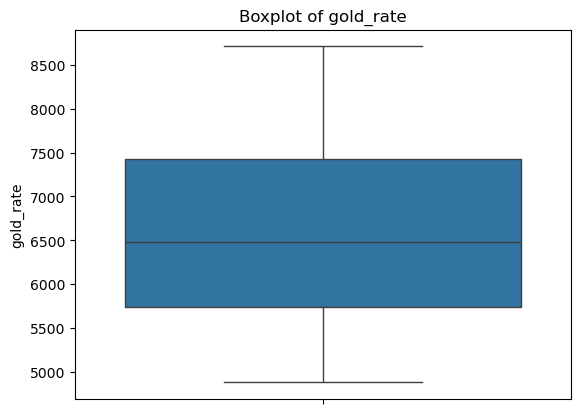

In [26]:
# Visualize the variable in boxplot
sns.boxplot(data=gold_dataset, y= 'gold_rate')
plt.title("Boxplot of gold_rate")
plt.show()

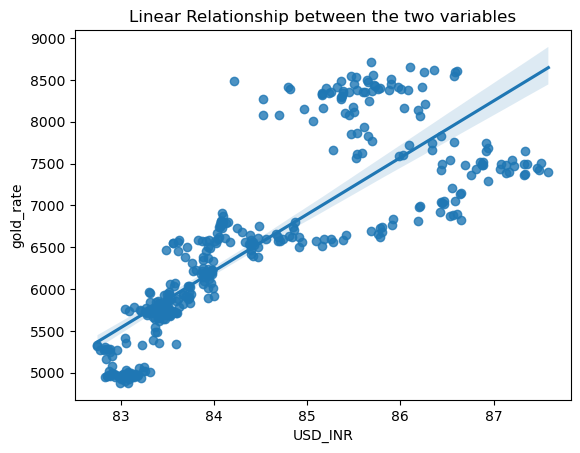

In [27]:
# visualize the relationship between the two variables
sns.regplot(data= gold_dataset, x = 'USD_INR', y= 'gold_rate')
plt.title("Linear Relationship between the two variables")
plt.show()

**Insight:** As the USD/INR increases, the gold rate also tends to rise, showing a positive relationship between the two variables.

## Model training

So basically, I am going to teaching the model: “If I know the USD to INR rate, can I predict the gold rate in INR?”

In [28]:
# Assigning the columns to X,y variables
X = gold_dataset[['USD_INR']]
y = gold_dataset[['gold_rate']]

In [29]:
type(X)

pandas.core.frame.DataFrame

In [30]:
X.head()

,USD_INR
0,83.248596
1,83.202599
2,83.257004
3,83.318100
4,83.240601


In [32]:
# Splits data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 42)

X_train	90% of the input data for training the model

X_test	10% of the input data to test the model

y_train	90% of the output data (gold rates) for training

y_test	10% of the output data to check predictions

test_size=0.1	=10% of the full dataset will be used for testing

random_state=42	Keeps the split the same every time you run it

In [33]:
len(X_train)

352

In [35]:
# Transform the values using standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

fit_transform(X_train) → calculates mean & std from training data, then applies scaling

transform(X_test) → uses the same mean & std from training to scale test data

In [36]:
X_train_scaled[:5]

array([[-0.96891716],
       [-0.57899468],
       [ 0.94562025],
       [-0.6889582 ],
       [-0.42133368]])

## Using linear regression

In [38]:
# Build the model to learn the releationship between the two variables
regressor = LinearRegression()

regressor.fit(X_train_scaled, y_train)   

LinearRegression()

In [ ]:
# Print the model's parameters
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
# Print the slope(m) value
regressor.coef_

array([[874.92586566]])

In [41]:
# Print the intercept(b)
regressor.intercept_

array([6540.76110795])

In [42]:
# y = mx + b
m = regressor.coef_[0][0]
b = regressor.intercept_[0]

In [43]:
m, b

(np.float64(874.9258656619443), np.float64(6540.761107954547))

In [44]:
# Predic the gold_rate from the training
X_train_predict = regressor.predict(X_train_scaled)

In [45]:
X_train_predict[:5]

array([[5693.0304213 ],
       [6034.18368246],
       [7368.10872511],
       [5937.97376136],
       [6172.12537696]])

### Visualize actual vs prediction

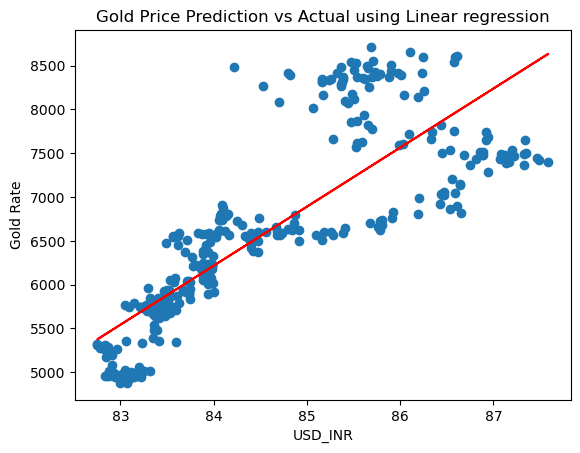

In [71]:
plt.scatter(X_train, y_train)   # Scatter plot (dots) of actual data
plt.plot(X_train, X_train_predict, color = "Red")   # Line plot of model predictions
plt.xlabel("USD_INR")
plt.ylabel("Gold Rate")
plt.title("Gold Price Prediction vs Actual using Linear regression")

plt.show()

Dots = Real values

Line = Model’s predicted values

In [47]:
# Predict the test data
X_test_predict = regressor.predict(X_test_scaled)

In [48]:
X_test_predict

array([[5943.5033628 ],
       [7948.06361089],
       [6787.27424692],
       [5466.90315754],
       [7197.19517463],
       [6177.04800819],
       [5506.88088994],
       [6474.30909352],
       [6032.49651105],
       [5899.00421676],
       [5593.1169532 ],
       [6242.51334533],
       [8463.90083914],
       [6141.72028481],
       [7706.76209205],
       [7024.59959655],
       [5947.41266241],
       [7619.8573328 ],
       [7857.45016083],
       [7705.54815164],
       [5625.88305656],
       [7371.61166332],
       [6574.15569203],
       [5709.41347298],
       [5892.60016673],
       [5798.54550424],
       [5991.84493885],
       [5570.86480827],
       [5754.18524122],
       [5882.95551307],
       [6037.55288147],
       [6853.14594547],
       [8584.58503336],
       [6867.10111633],
       [5798.00540364],
       [7808.97484558],
       [5874.19045183],
       [5570.39157727],
       [5820.05179595],
       [5541.33416472]])

In [ ]:
# Calculate evaluation metrics for X_train_Lr model
mae = mean_absolute_error(y_train, X_train_predict)
mse = mean_squared_error(y_train, X_train_predict)
r2 = r2_score(y_train, X_train_predict)

print("Simple Linear Regression: ")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Simple Linear Regression: 
Mean Absolute Error (MAE): 463.97
Mean Squared Error (MSE): 373678.68
R² Score: 0.6720


In [ ]:
# Calculate evaluation metrics for X_test_Lr model
mae = mean_absolute_error(y_test, X_test_predict)
mse = mean_squared_error(y_test, X_test_predict)
r2 = r2_score(y_test, X_test_predict)

print("Simple Linear Regression: ")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Simple Linear Regression: 
Mean Absolute Error (MAE): 484.32
Mean Squared Error (MSE): 419475.23
R² Score: 0.6769


| Metric | Ideal Value | Meaning                           |
| ------ | ----------- | --------------------------------- |
| MAE    | Close to 0  | Smaller = Better (fewer ₹ errors) |
| MSE    | Close to 0  | Lower = Better (no large errors)  |
| R²     | Close to 1  | Higher = Better (model fits well) |


## Using Random Forest Regressor

In [52]:
# Build the model to learn the releationship between the two variables
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train_scaled, y_train)

c:\Users\sanka\anaconda3\envs\learning\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [53]:
X_train_predict_rfr = rfr_model.predict(X_train_scaled)

In [54]:
X_train_predict_rfr[0]

np.float64(5617.636800000008)

In [79]:
X_test_predict_rfr = rfr_model.predict(X_test_scaled)

In [80]:
X_test_predict_rfr[0]

np.float64(5718.750000000001)

In [ ]:
# Calculate evaluation metrics for X_train_rfr model
mae = mean_absolute_error(y_train, X_train_predict_rfr)
mse = mean_squared_error(y_train, X_train_predict_rfr)
r2 = r2_score(y_train, X_train_predict_rfr)

print("RandomForestRegressor:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

RandomForestRegressor:
Mean Absolute Error (MAE): 121.61
Mean Squared Error (MSE): 37145.53
R² Score: 0.9674


In [ ]:
# Calculate evaluation metrics for X_test_rfr_model
mae = mean_absolute_error(y_test, X_test_predict_rfr)
mse = mean_squared_error(y_test, X_test_predict_rfr)
r2 = r2_score(y_test, X_test_predict_rfr)

print("RandomForestRegressor:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

RandomForestRegressor:
Mean Absolute Error (MAE): 262.26
Mean Squared Error (MSE): 186641.77
R² Score: 0.8563


**No severe overfitting**

## Comparing the models using plots

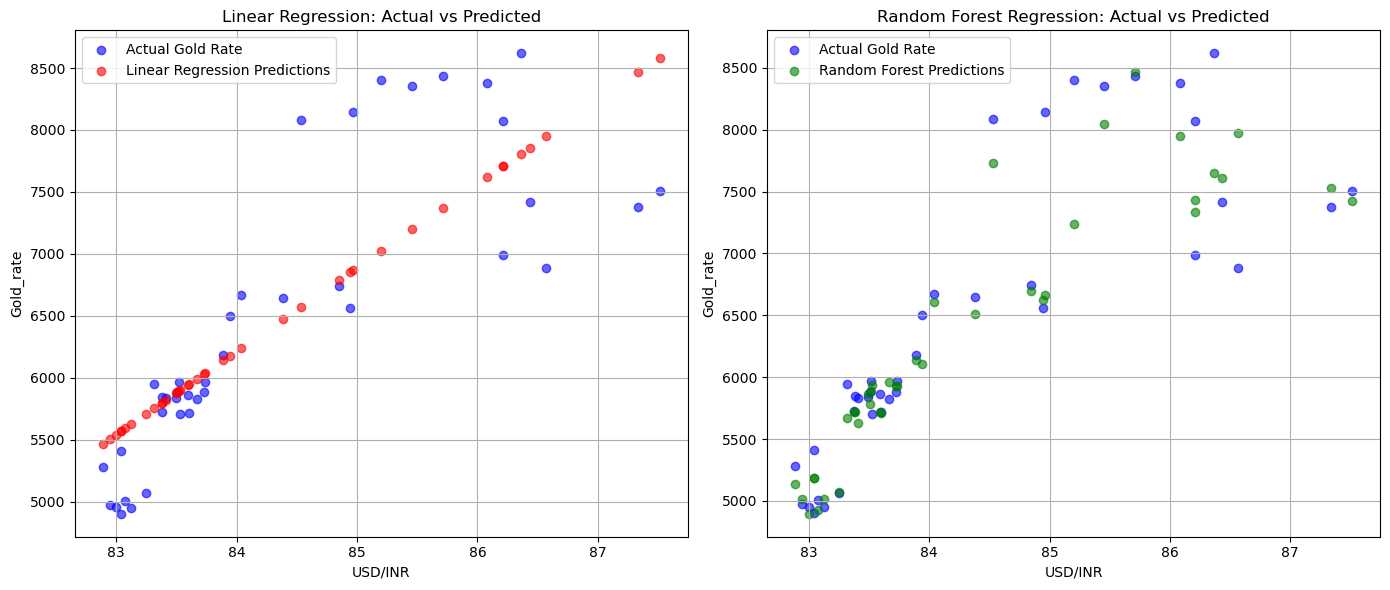

In [83]:
# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# Plot 1: Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual Gold Rate', alpha=0.6)
plt.scatter(X_test, X_test_predict, color='red', label='Linear Regression Predictions', alpha=0.6)
plt.xlabel('USD/INR')
plt.ylabel('Gold_rate')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)

# Plot 2: Random Forest Regression
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual Gold Rate', alpha=0.6)
plt.scatter(X_test, X_test_predict_rfr, color='green', label='Random Forest Predictions', alpha=0.6)
plt.xlabel('USD/INR')
plt.ylabel('Gold_rate')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Random Forest's predictions closely follow actual gold rates with higher accuracy (R²: 0.85 vs 0.67) → Deploy Random Forest.

Why?

-- Lower errors (MAE: 262 vs 484) and better fit for non-linear trends.

-- Visual plots confirm RF predictions align tighter with actual data points.

## MLOPS

-- Save the model

-- Build interface

-- Connect model & Interface

In [86]:
# Save the dataframes
gold_dataset.to_csv("gold_dataset_for_price_predictions.csv", index=False)

In [90]:
#Save the model using pickle for later use
pickle.dump(regressor, open('regressor.pkl', 'wb'))
pickle.dump(rfr_model, open('rfr_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [91]:
# Reload the model
regressor_reloaded = pickle.load(open('regressor.pkl', 'rb'))
rfr_reloaded = pickle.load(open('rfr_model.pkl', 'rb'))
scaler_reloded = pickle.load(open('scaler.pkl', 'rb'))

### Creating the demo interface

In [95]:
# Prediction function
def predict_gold_price(usd_inr):
    scaled_input = scaler_reloded.transform(np.array(usd_inr).reshape(1, -1))
    prediction = rfr_model.predict(scaled_input)
    
    return prediction[0].round(2)

# Create input and output interface
import gradio as gr

interface = gr.Interface(fn=predict_gold_price, inputs="number", outputs="number", title="Gold Price Predictor")
    
interface.launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


c:\Users\sanka\anaconda3\envs\learning\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
